In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [2]:
%matplotlib inline 

In [3]:
#below is step1.

In [4]:
df=pd.read_csv("./boston.csv")
print("size of the dataframe= ", df.shape)
df.head()

size of the dataframe=  (506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
print("\ncolumn names in the data:")
df.columns


column names in the data:


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [7]:
df.isnull()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

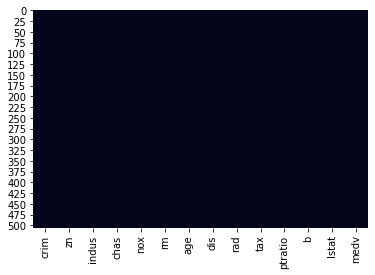

In [8]:
sns.heatmap(df.isnull(), cbar=False)

In [9]:
# count NA values in each column
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [10]:
# get how many values can the features take
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

In [11]:
print("Summary: ")
print("14 kinds of features in the dataset.")
print("From the above process, we can see there is no NaN or Null in this dataset.")
print("Assumption for the most relevent attribute for MEDV: rm ")

Summary: 
14 kinds of features in the dataset.
From the above process, we can see there is no NaN or Null in this dataset.
Assumption for the most relevent attribute for MEDV: rm 


In [12]:
#below is step2.

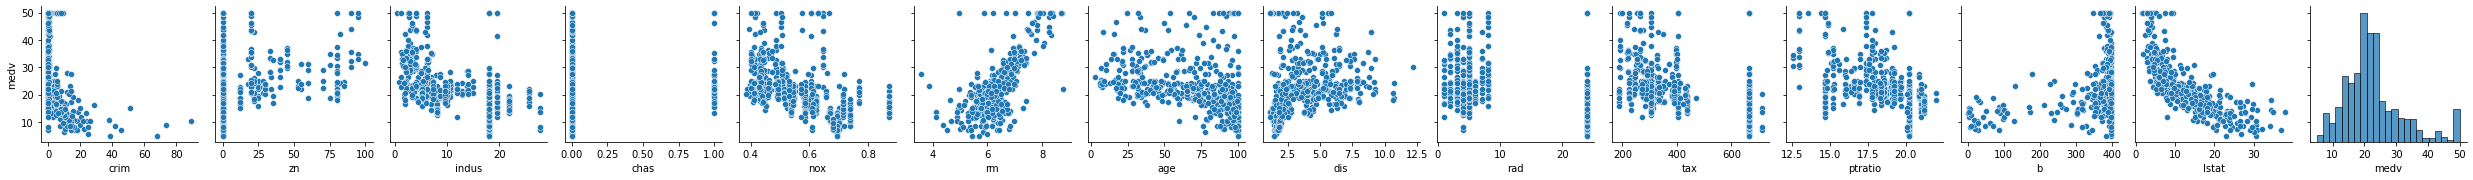

In [13]:
pairplot_fig=sns.pairplot(df,y_vars='medv')
pairplot_fig.savefig('./picpairplot.png',dpi=400)

In [14]:
print("The above figures are so small to see clear.")
print("So I use another method to draw the figures as below.")

The above figures are so small to see clear.
So I use another method to draw the figures as below.


AttributeError: 'NoneType' object has no attribute 'savefig'

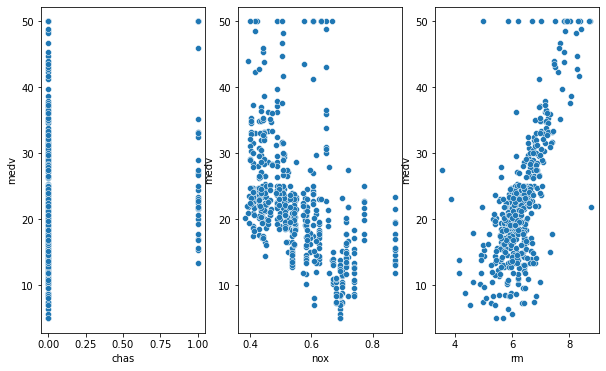

In [17]:
fig,axes=plt.subplots(1,3,figsize=(10,6))
sns.scatterplot(x="chas", y="medv",data=df,ax=axes[0])
sns.scatterplot(x="nox", y="medv",data=df,ax=axes[1])
sns.scatterplot(x="rm", y="medv",data=df,ax=axes[2])
scatter_fig = fig.get_figure()
scatter_fig.savefig('./pic1.png', dpi = 400)
print("the MEDV distributions over attributes: CHAS, NOX, and RM")

AttributeError: 'NoneType' object has no attribute 'savefig'

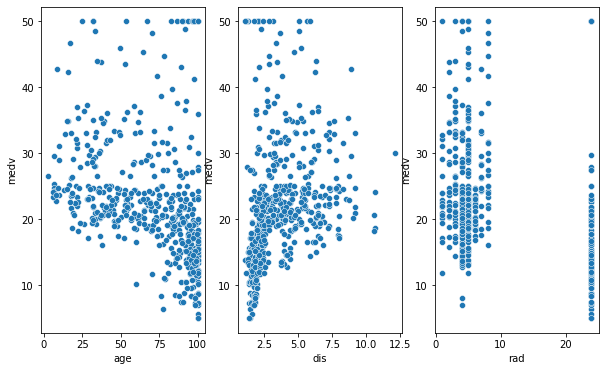

In [18]:
fig,axes=plt.subplots(1,3,figsize=(10,6))
sns.scatterplot(x="age", y="medv",data=df,ax=axes[0])
sns.scatterplot(x="dis", y="medv",data=df,ax=axes[1])
sns.scatterplot(x="rad", y="medv",data=df,ax=axes[2])
scatter_fig = fig.get_figure()
scatter_fig.savefig('./pic2.png', dpi = 400)
print("the MEDV distributions over attributes: AGE, DIS, and RAD")

AttributeError: 'NoneType' object has no attribute 'savefig'

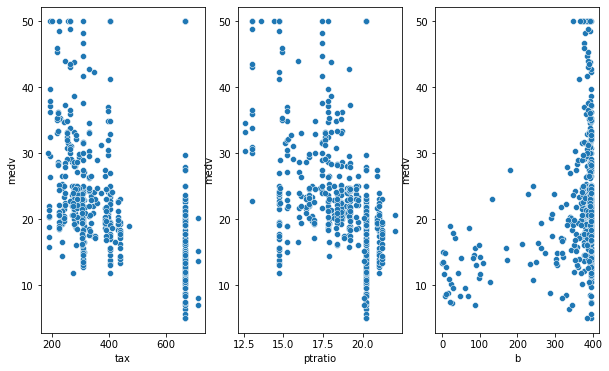

In [19]:
fig,axes=plt.subplots(1,3,figsize=(10,6))
sns.scatterplot(x="tax", y="medv",data=df,ax=axes[0])
sns.scatterplot(x="ptratio", y="medv",data=df,ax=axes[1])
sns.scatterplot(x="b", y="medv",data=df,ax=axes[2])
scatter_fig = fig.get_figure()
scatter_fig.savefig('./pic3.png', dpi = 400)
print("the MEDV distributions over attributes: TAX, PTRATIO, and B")

AttributeError: 'NoneType' object has no attribute 'savefig'

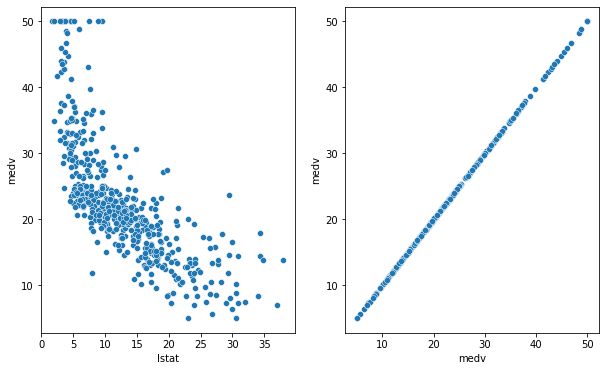

In [20]:
fig,axes=plt.subplots(1,2,figsize=(10,6))
sns.scatterplot(x="lstat", y="medv",data=df,ax=axes[0])
sns.scatterplot(x='medv',y='medv',data=df,ax=axes[1])
scatter_fig = fig.get_figure()
scatter_fig.savefig('./pic4.png', dpi = 400)
print("the MEDV distributions over attributes: LSTAT and MEDV itself")

In [21]:
print("the characteristics of the attributes:")
print("Revised assumption for most relevant attribute for MEDV: 'rm'")

the characteristics of the attributes:
Revised assumption for most relevant attribute for MEDV: 'rm'


In [22]:
#below is step3.

AttributeError: 'NoneType' object has no attribute 'savefig'

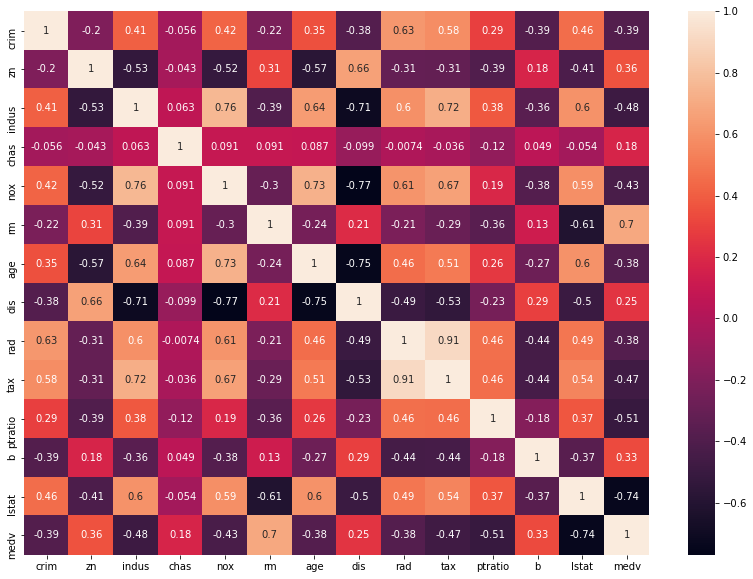

In [23]:
# plot the covariance matrix
fig=plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)
heatmap_fig = fig.get_figure()
heatmap_fig.savefig('./pic5.png', dpi = 400)
plt.title("Heatmap of covariance matrix")
plt.show()

In [ ]:
print("Assume if covariance >0.4 or <-0.4, then the attribute is good predictor")
print("The covariances between medv and nox,rm,tax,ptratio,lstat are -0.43,0.7,-0.47,-0.51,and -0.74, respectively.")
print("Good predictors: nox,rm,tax,ptratio,and lstat")
#print("Plus, rm has positive linear relationship with medv, while ptratio and lstat have negative linear relationship with medv.")

In [ ]:
#below is step4.

MinMaxScaler()
[  0.871   8.78  711.     22.     37.97   50.   ]


AttributeError: 'NoneType' object has no attribute 'savefig'

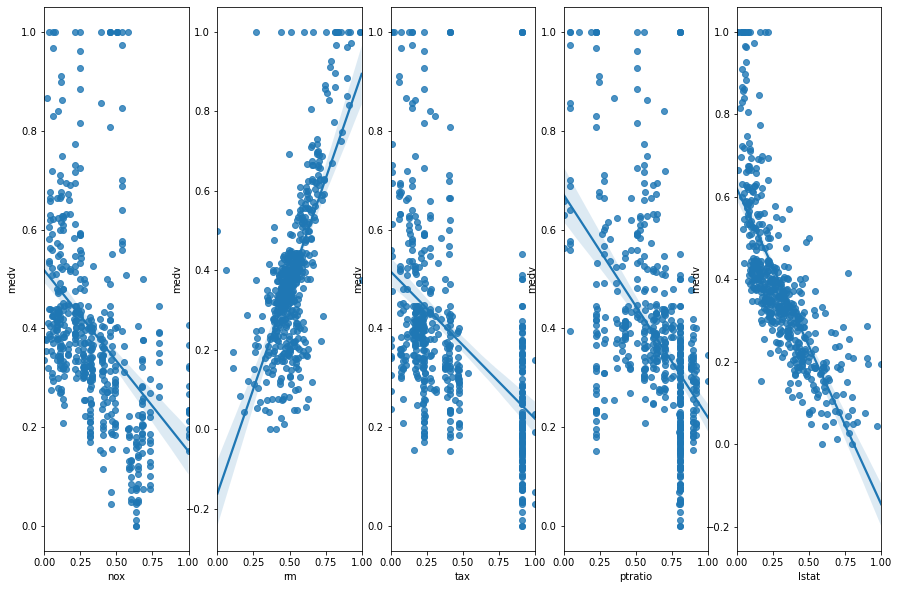

In [24]:
df1 = df[["nox","rm","tax","ptratio","lstat", "medv"]].to_numpy()
scaler = MinMaxScaler()
print(scaler.fit(df1[:,:]))
print(scaler.data_max_)
df2=scaler.transform(df1[:,:])
#print(df2)

fig,axes=plt.subplots(1,5,figsize=(15,10))

sns.regplot(x=df2[:,0],y=df2[:,-1],ci=95,ax=axes[0])
axes[0].set_xlabel("nox")
axes[0].set_ylabel("medv")

sns.regplot(x=df2[:,1],y=df2[:,-1],ci=95,ax=axes[1])
axes[1].set_xlabel("rm")
axes[1].set_ylabel("medv")

sns.regplot(x=df2[:,2],y=df2[:,-1],ci=95,ax=axes[2])
axes[2].set_xlabel("tax")
axes[2].set_ylabel("medv")

sns.regplot(x=df2[:,3],y=df2[:,-1],ci=95,ax=axes[3])
axes[3].set_xlabel("ptratio")
axes[3].set_ylabel("medv")

sns.regplot(x=df2[:,4],y=df2[:,-1],ci=95,ax=axes[4])
axes[4].set_xlabel("lstat")
axes[4].set_ylabel("medv")
regplot_fig = fig.get_figure()
regplot_fig.savefig('./pic6.png', dpi = 600)

In [ ]:
#below is step5

In [25]:
def get_full_sample_matrix(samples):
    samples_matrix = samples.copy()
    if samples.ndim == 1:
        samples_matrix = samples_matrix.reshape(-1, 1)
        
    ones_vec = np.ones((samples_matrix.shape[0], 1), dtype=samples.dtype)
    return np.hstack([ones_vec, samples_matrix])

Xs = get_full_sample_matrix(df2[:, :-1])
Ys = df2[:, -1].reshape((Xs.shape[0], 1))

In [26]:
# split data
train_length=math.floor(len(Xs)*0.8)

Xs_train=[]
Xs_test=[]
Ys_train=[]
Ys_test=[]

Xs_permu=np.random.permutation(Xs)
Ys_permu=np.random.permutation(Ys)

Xs_train=Xs_permu[:train_length]
Xs_test=Xs_permu[train_length:]
#print(len(Xs_train))
Ys_train=Ys_permu[:train_length]
Ys_test=Ys_permu[train_length:]
#print(y_train)

W= [[0.19985969]
 [0.0586063 ]
 [0.10284013]
 [0.0605572 ]
 [0.11115854]
 [0.05493765]]
RMSE of train= 0.21447807179331382
RMSE of test= 0.18712875052971853


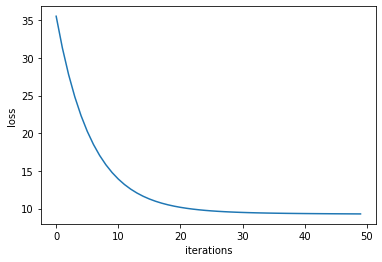

In [27]:
def grad_desc(Xs, Ys, rate = 0.00001, iterations = 100):
    trainLoss=[]
    Ws = np.zeros((Xs.shape[1], 1))
    for _ in range(iterations):
        train_loss=0
        #errors = Ys - Xs.dot(Ws)
        #grad = -(Xs.T).dot(errors)
        #Ws = Ws - (grad)*rate
        Ws=Ws-rate*np.dot(np.transpose(Xs),(np.dot(Xs,Ws)-Ys))
        for i in range(len(Xs)):
            train_loss+=(Ys[i] - Xs[i].dot(Ws))**2
        train_loss=train_loss/2
        trainLoss.append(train_loss)
                                          
    return Ws,trainLoss

r=0.0001
itera=50
w,trainLoss = grad_desc(Xs_train, Ys_train,rate=r, iterations=itera)
print("W=",w)
#print(trainLoss)
iterations=[i for i in range(itera)]
plt.plot(iterations,trainLoss)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.savefig('imageGradient.jpg', dpi=600)
prediction_train=Xs_train.dot(w)
RMSE=np.sqrt(metrics.mean_squared_error(Ys_train, prediction_train))
print("RMSE of train=",RMSE)

prediction_test=Xs_test.dot(w)
RMSE=np.sqrt(metrics.mean_squared_error(Ys_test, prediction_test))
print("RMSE of test=",RMSE)

step size=  0.01 iteration steps=  50
RMSE of train= 1.1779123177217705e+43
RMSE of test= 1.2022162535725782e+43
W= [[-5.59420911e+42]
 [-2.09703959e+42]
 [-2.88404962e+42]
 [-2.59069701e+42]
 [-3.58243511e+42]
 [-1.76642450e+42]]


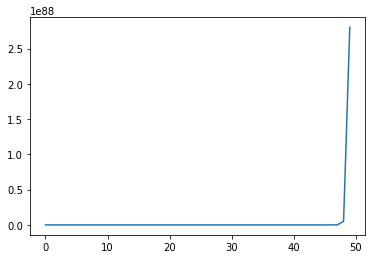

step size=  0.001 iteration steps=  50
RMSE of train= 0.1992813709010587
RMSE of test= 0.2200310459371529
W= [[ 0.28328022]
 [ 0.01609919]
 [ 0.16026235]
 [-0.05610404]
 [ 0.02910798]
 [ 0.0561496 ]]


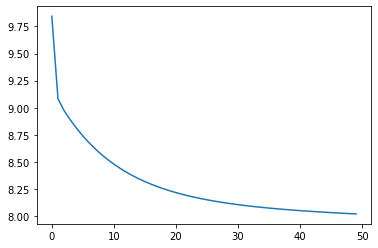

step size=  0.001 iteration steps=  100
RMSE of train= 0.20218004275655319
RMSE of test= 0.20677042229746945
W= [[ 0.26447909]
 [ 0.08476208]
 [ 0.09485704]
 [-0.02912374]
 [ 0.06704537]
 [ 0.04132532]]


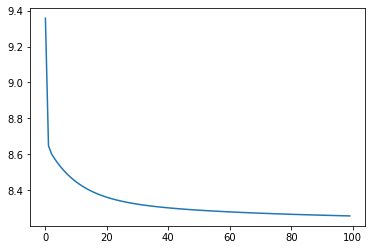

step size=  0.001 iteration steps=  500
RMSE of train= 0.1939133047343398
RMSE of test= 0.237869439880323
W= [[ 0.32834168]
 [-0.02713178]
 [ 0.06028133]
 [ 0.02086394]
 [ 0.02390967]
 [ 0.0422241 ]]


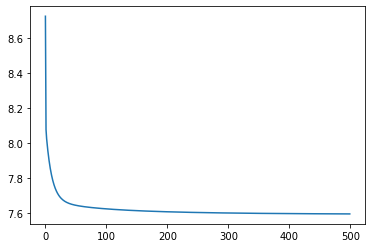

step size=  0.0001 iteration steps=  50
RMSE of train= 0.2120851668007535
RMSE of test= 0.2073703812222418
W= [[0.19782311]
 [0.04899881]
 [0.10875346]
 [0.05495731]
 [0.10900506]
 [0.04728677]]


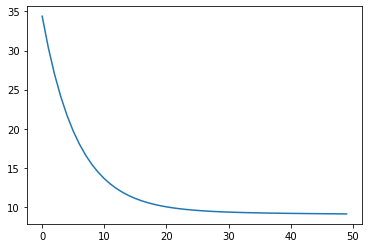

step size=  0.0001 iteration steps=  100
RMSE of train= 0.21091118448782628
RMSE of test= 0.19123213887247142
W= [[0.20899332]
 [0.05161514]
 [0.11252435]
 [0.05310082]
 [0.10846608]
 [0.04664985]]


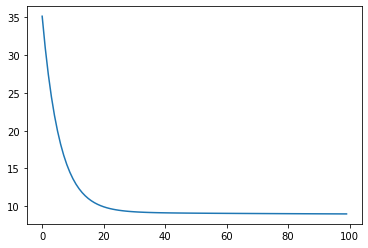

step size=  0.0001 iteration steps=  500
RMSE of train= 0.20705020519397005
RMSE of test= 0.19842040435510194
W= [[0.25859091]
 [0.03187709]
 [0.13406607]
 [0.00078664]
 [0.06456016]
 [0.03660703]]


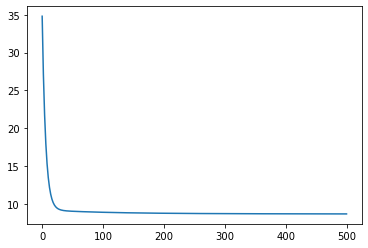

step size=  1e-05 iteration steps=  50
RMSE of train= 0.3269453564752201
RMSE of test= 0.33221167933249185
W= [[0.06425505]
 [0.02343464]
 [0.03332064]
 [0.02757211]
 [0.03960594]
 [0.01927409]]


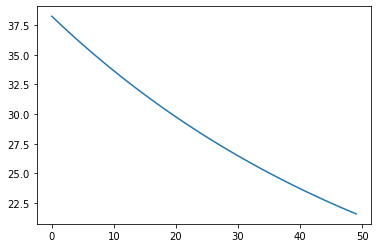

step size=  1e-05 iteration steps=  100
RMSE of train= 0.2715384603395754
RMSE of test= 0.26250209307107997
W= [[0.10801587]
 [0.0352006 ]
 [0.05721993]
 [0.04138834]
 [0.06603687]
 [0.03057659]]


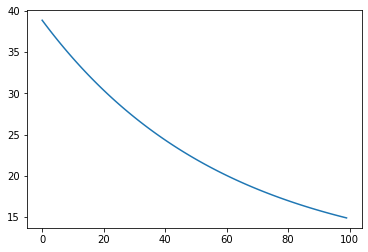

step size=  1e-05 iteration steps=  500
RMSE of train= 0.20679735419130027
RMSE of test= 0.22558725199852053
W= [[0.19705888]
 [0.05633223]
 [0.10345368]
 [0.05970941]
 [0.10603675]
 [0.05089452]]


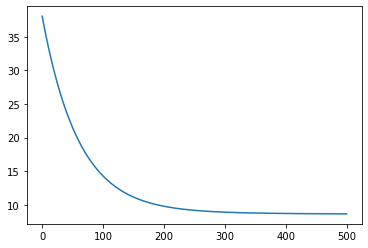

In [28]:
#below is step6
step_iter_=[[0.01,50],[0.001,50],[0.001,100],[0.001,500],[0.0001,50],[0.0001,100],[0.0001,500],[0.00001,50],[0.00001,100],[0.00001,500]]
for i in range(10):
    # split data
    train_length=math.floor(len(Xs)*0.8)

    Xs_train=[]
    Xs_test=[]
    Ys_train=[]
    Ys_test=[]

    Xs_permu=np.random.permutation(Xs)
    Ys_permu=np.random.permutation(Ys)

    Xs_train=Xs_permu[:train_length]
    Xs_test=Xs_permu[train_length:]
    #print(len(Xs_train))
    Ys_train=Ys_permu[:train_length]
    Ys_test=Ys_permu[train_length:]
    #print(y_train)
    
    r=step_iter_[i][0]
    itera=step_iter_[i][1]
    print("step size= ",r,"iteration steps= ",itera)
    w,trainLoss = grad_desc(Xs_train, Ys_train,rate=r, iterations=itera)
    prediction_train=Xs_train.dot(w)
    RMSE=np.sqrt(metrics.mean_squared_error(Ys_train, prediction_train))
    print("RMSE of train=",RMSE)
    prediction_test=Xs_test.dot(w)
    RMSE=np.sqrt(metrics.mean_squared_error(Ys_test, prediction_test))
    print("RMSE of test=",RMSE)
    print("W=",w)
    #print(trainLoss)
    iterations=[i for i in range(step_iter_[i][1])]
    plt.plot(iterations,trainLoss)
    plt.show()